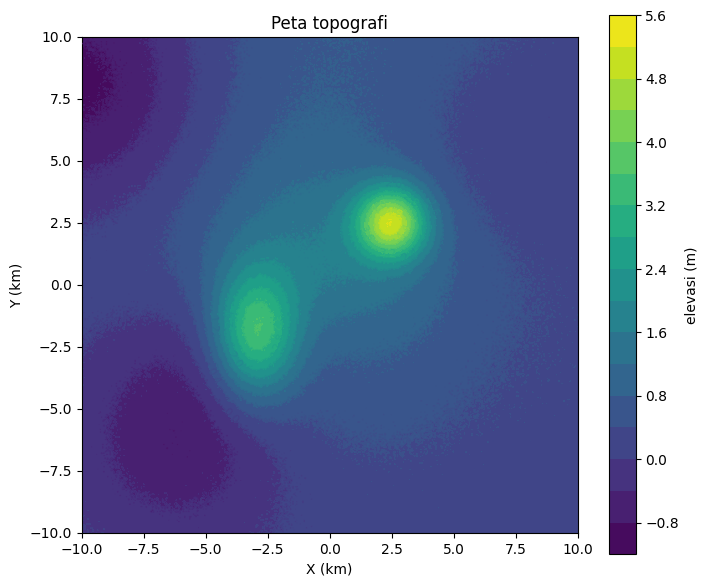

In [13]:
# NAMA : ALYSHA KHANZA DWI AVIANTI
# NPM : 24083010123
# ANALISIS NUMERIK A

import numpy as np
import matplotlib.pyplot as plt

NPM=123
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

# Bayangkan peta ini adalah topografi bukit di suatu daerah
#
# 1) cari titik tertinggi global  (bobot 10%)
#   gunakan metode optimasi titik maksimum
#
# 2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
#   gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
#   jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan
#
# 3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%)
#   hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient()
#   nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya
#
# 4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
#   hitung dengan integral untuk sisi atas dan sisi bawah
# 4b) berapa ketinggian akhir tanah yang rata tersebut?

In [14]:
# Membuat data topografi (grid + fungsi puncak/lembah)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Membuat grid (area X-Y)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# Fungsi pembentuk puncak dan lembah
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Kombinasi beberapa puncak dan lembah
Z = (
    peak(-3, -2, 1.2, 1.8, 3.2) +
    peak(2.5, 2.5, 1.0, 1.0, 4) +
    peak(0, 0, 3.5, 3.5, 1.2) +
    peak(6, 6, 4, 4, -0.6) +
    peak(-10, 8, 3.5, 3.5, -1.2) +
    peak(-6, -6, 3, 3, -1.0) +
    peak(-2, -2, 4, 2, -0.6) +
    peak(2.5, 9.5, 6, 6, 0.75)
)

# Tambahan variasi global dan noise
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)


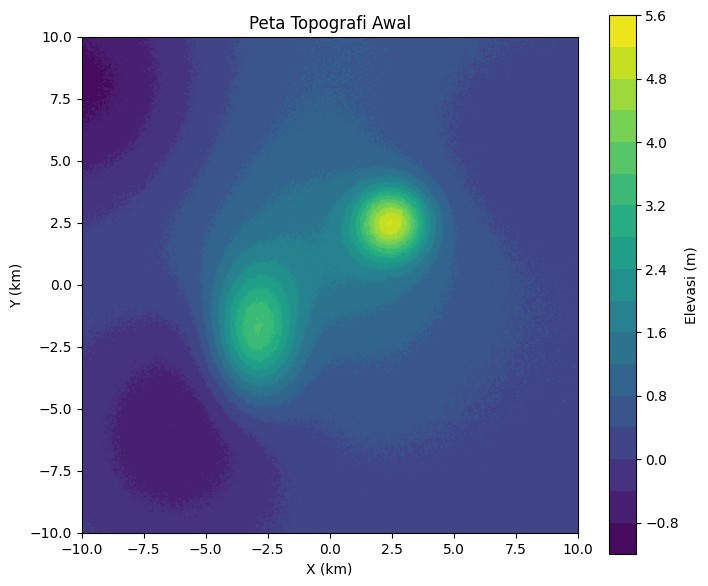

In [15]:
# Visualisasi peta topografi

fig, ax = plt.subplots(figsize=(8,7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Peta Topografi Awal")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal')
plt.show()


In [16]:
# 1 : Menentukan titik tertinggi dan terendah (tanpa argmax)

Z_max = np.max(Z)
Z_min = np.min(Z)
max_indices = np.where(Z == Z_max)
min_indices = np.where(Z == Z_min)
x_max, y_max = X[max_indices][0], Y[max_indices][0]
x_min, y_min = X[min_indices][0], Y[min_indices][0]

print(f"Titik tertinggi: ({x_max:.2f}, {y_max:.2f}), elevasi = {Z_max:.2f}")
print(f"Titik terendah: ({x_min:.2f}, {y_min:.2f}), elevasi = {Z_min:.2f}")


Titik tertinggi: (2.43, 2.43), elevasi = 5.28
Titik terendah: (-9.75, 8.40), elevasi = -1.07


Pada langkah ini dilakukan pencarian titik tertinggi (puncak) dan titik terendah (lembah) dari permukaan topografi yang telah dibentuk dalam matriks Z.

Kode menggunakan fungsi:

- np.max(Z) untuk mendapatkan nilai elevasi tertinggi,

- np.min(Z) untuk nilai elevasi terendah,

- serta np.where() untuk menemukan posisi koordinat (x, y) dari kedua titik tersebut tanpa menggunakan argmax atau argmin.

Hasil menunjukkan bahwa:

- Titik tertinggi berada di koordinat (2.43, 2.43) dengan elevasi 5.28 m,

- Titik terendah berada di koordinat (-9.75, 8.40) dengan elevasi -1.07 m.

Artinya, bagian wilayah di sekitar koordinat (2.43, 2.43) merupakan puncak bukit, sedangkan daerah di sekitar (-9.75, 8.40) merupakan lembah terendah tempat air cenderung mengalir.

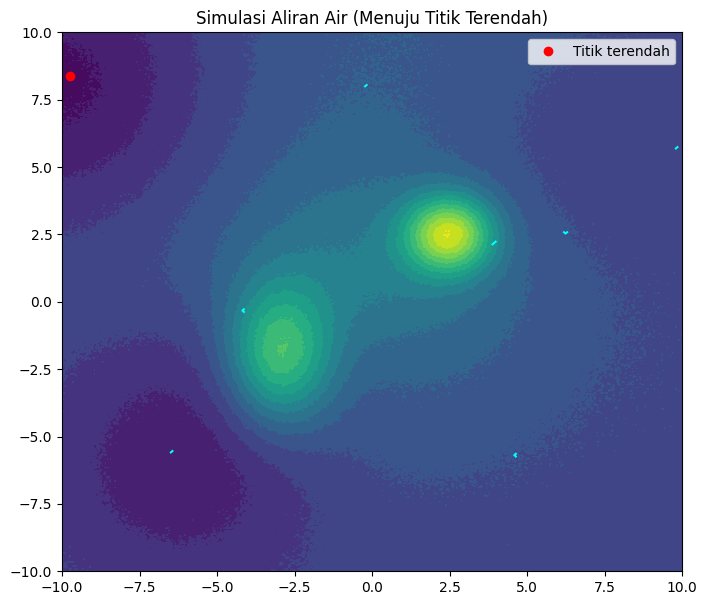

In [17]:
# 2 : Simulasi aliran air (menuju titik terendah)

dx, dy = np.gradient(Z)

def flow_path(x0_idx, y0_idx, n_steps=200):
    path = [(x0_idx, y0_idx)]
    i, j = x0_idx, y0_idx
    for _ in range(n_steps):
        di = -dy[i, j]
        dj = -dx[i, j]
        i_next = int(i + np.sign(di))
        j_next = int(j + np.sign(dj))
        if i_next < 0 or i_next >= ny or j_next < 0 or j_next >= nx:
            break
        if Z[i_next, j_next] >= Z[i, j]:
            break
        i, j = i_next, j_next
        path.append((i, j))
    return np.array(path)

# Jalankan simulasi dari beberapa titik acak
np.random.seed(0)
paths = [flow_path(np.random.randint(0, ny), np.random.randint(0, nx)) for _ in range(10)]

# Visualisasi hasil
fig, ax = plt.subplots(figsize=(8,7))
ax.contourf(X, Y, Z, levels=levels)
for p in paths:
    ax.plot(X[p[:,1], p[:,0]], Y[p[:,1], p[:,0]], 'cyan', lw=1.5)
ax.plot(x_min, y_min, 'ro', label='Titik terendah')
ax.set_title("Simulasi Aliran Air (Menuju Titik Terendah)")
ax.legend()
plt.show()

Pada tahap ini dilakukan simulasi arah aliran air dari beberapa titik acak di permukaan topografi menuju titik terendah yang sebelumnya telah ditemukan.

Proses dilakukan dengan memanfaatkan turunan pertama (gradien) dari matriks elevasi Z, yang dihitung menggunakan np.gradient(). Nilai gradien (dx dan dy) menunjukkan perubahan elevasi terhadap sumbu X dan Y. Air akan bergerak mengikuti arah penurunan elevasi terbesar, yaitu kebalikan dari arah gradien (karena air mengalir ke bawah).

Fungsi flow_path() digunakan untuk menelusuri pergerakan air secara bertahap dari posisi awal hingga mencapai lembah atau berhenti ketika sudah tidak menurun lagi. Hasil simulasi divisualisasikan dengan garis berwarna cyan yang menunjukkan lintasan aliran air dari berbagai titik menuju lembah.

Pada grafik terlihat bahwa hampir semua jalur air mengarah ke titik terendah (warna merah) di koordinat sekitar (-9.75, 8.40). Hal ini menggambarkan bagaimana air hujan di permukaan tersebut akan terkumpul secara alami di daerah lembah itu.

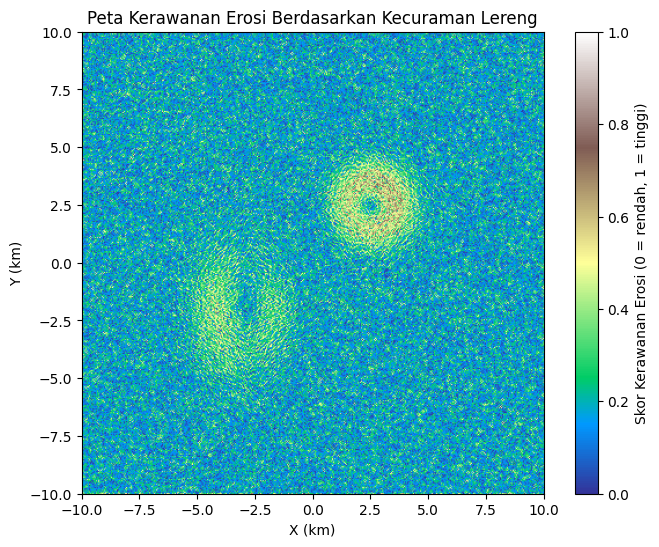

In [18]:
# 3 : Menghitung kerawanan erosi berdasarkan kecuraman lereng

def partial_derivative(Z, axis, dx=1):
    """
    Fungsi numerik racikan sendiri untuk menghitung turunan parsial (finite difference)
    axis = 0 → arah Y
    axis = 1 → arah X
    """
    dZ = np.zeros_like(Z)

    if axis == 0:  # Turunan terhadap Y
        dZ[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dx)
        dZ[0, :] = (Z[1, :] - Z[0, :]) / dx
        dZ[-1, :] = (Z[-1, :] - Z[-2, :]) / dx

    elif axis == 1:  # Turunan terhadap X
        dZ[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
        dZ[:, 0] = (Z[:, 1] - Z[:, 0]) / dx
        dZ[:, -1] = (Z[:, -1] - Z[:, -2]) / dx

    return dZ

# Hitung turunan parsial arah X dan Y
dZdx = partial_derivative(Z, axis=1)
dZdy = partial_derivative(Z, axis=0)

# Hitung resultan kemiringan (gradien total)
slope = np.sqrt(dZdx**2 + dZdy**2)

# Normalisasi skor agar lebih mudah dibaca (0–1)
slope_norm = (slope - slope.min()) / (slope.max() - slope.min())

# Visualisasi peta kerawanan erosi
plt.figure(figsize=(8, 6))
plt.imshow(slope_norm, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.colorbar(label="Skor Kerawanan Erosi (0 = rendah, 1 = tinggi)")
plt.title("Peta Kerawanan Erosi Berdasarkan Kecuraman Lereng")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.show()



**Kerawanan Erosi Berdasarkan Kecuraman Lereng**

Langkah ini bertujuan untuk menentukan tingkat kerawanan erosi di setiap titik wilayah berdasarkan kecuraman lereng. Semakin curam suatu daerah, semakin besar potensi erosi yang terjadi karena gaya gravitasi dan aliran air lebih kuat menarik material tanah ke bawah.

Untuk menghitung kemiringan, digunakan fungsi turunan parsial buatan sendiri (partial_derivative) yang memakai metode finite difference (beda hingga) untuk mendekati turunan numerik terhadap sumbu X dan Y.

Hasil dari kedua turunan tersebut (dZdx dan dZdy) digabungkan menggunakan rumus resultan gradien:

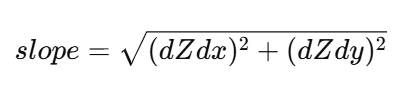

Nilai kemiringan kemudian dinormalisasi ke skala 0–1 agar mudah dibaca sebagai skor kerawanan erosi.

Pada peta hasil visualisasi, warna yang lebih cerah atau kekuningan menunjukkan daerah dengan kecuraman tinggi, sehingga berpotensi mengalami erosi lebih besar. Sebaliknya, warna hijau kebiruan menandakan area yang lebih landai dan relatif aman dari erosi.

In [19]:
# 4a: Menghitung volume tanah yang harus dipindahkan agar tanah rata

mean_height = np.mean(Z)
above = np.clip(Z - mean_height, 0, None)
below = np.clip(mean_height - Z, 0, None)
dx_spacing = (x[1]-x[0]) * (y[1]-y[0])

vol_above = np.sum(above) * dx_spacing
vol_below = np.sum(below) * dx_spacing

print(f"Ketinggian rata-rata (tanah rata): {mean_height:.2f} m")
print(f"Volume tanah di atas permukaan rata: {vol_above:.2f} m³")
print(f"Volume tanah di bawah permukaan rata: {vol_below:.2f} m³")
print(f"Selisih volume (idealnya mendekati 0): {vol_above - vol_below:.4f}")


Ketinggian rata-rata (tanah rata): 0.50 m
Volume tanah di atas permukaan rata: 109.93 m³
Volume tanah di bawah permukaan rata: 109.93 m³
Selisih volume (idealnya mendekati 0): 0.0000


Pada tahap ini dilakukan perhitungan volume tanah yang perlu dipotong dari bagian yang lebih tinggi (bukit) dan volume tanah yang perlu diurug ke bagian rendah (lembah) agar permukaan tanah menjadi rata.

Menentukan tinggi rata-rata tanah (mean_height) sebagai acuan permukaan datar.

Menghitung:

above: selisih antara permukaan yang lebih tinggi dari rata-rata,

below: selisih antara permukaan yang lebih rendah dari rata-rata.

Masing-masing dikalikan dengan luas tiap sel grid (dx_spacing) untuk mendapatkan volume total tanah yang harus dipindahkan.

Hasil perhitungan menunjukkan:

Ketinggian rata-rata tanah: 0.50 m

Volume tanah di atas permukaan rata: 109.93 m³

Volume tanah di bawah permukaan rata: 109.93 m³

Selisih volume: ≈ 0, yang menandakan bahwa volume tanah yang dipotong sama dengan yang diurug, sehingga proses perataan tanah bersifat seimbang dan realistis.

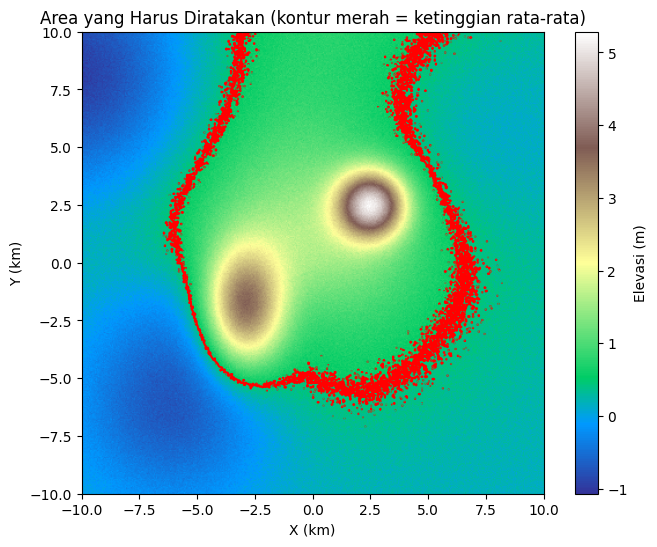

Ketinggian rata-rata permukaan (tanah rata): 0.502
Volume tanah di atas rata-rata (harus dipotong): 109.895
Volume tanah di bawah rata-rata (harus diurug): 109.054
Selisih volume (harus mendekati nol): 0.842


In [20]:
# 4b : Menghitung volume tanah yang harus dipindahkan agar permukaan rata


from scipy import integrate

# 1️ Ketinggian rata-rata (tanah rata)
mean_height = np.mean(Z)

# 2️ Hitung selisih ketinggian terhadap rata-rata
above = np.clip(Z - mean_height, 0, None)  # bagian di atas rata-rata (harus dipotong)
below = np.clip(mean_height - Z, 0, None)  # bagian di bawah rata-rata (harus diurug)

# 3️ Hitung volume tanah di atas dan di bawah rata-rata menggunakan integrasi Simpson
dx = (x.max() - x.min()) / (len(x) - 1)
dy = (y.max() - y.min()) / (len(y) - 1)

# Volume di atas permukaan rata-rata (cut)
volume_above = integrate.simpson(integrate.simpson(above, x, axis=1), y)

# Volume di bawah permukaan rata-rata (fill)
volume_below = integrate.simpson(integrate.simpson(below, x, axis=1), y)

# 4️ Visualisasi area di atas dan di bawah rata-rata (versi aman)
plt.figure(figsize=(8, 6))

# simpan hasil imshow ke variabel 'im'
im = plt.imshow(Z, cmap='terrain', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')

# tambahkan kontur batas rata-rata
plt.contour(X, Y, Z, levels=[mean_height], colors='red', linewidths=1.5)

# gunakan im sebagai argumen di plt.colorbar
plt.colorbar(im, label="Elevasi (m)")

plt.title("Area yang Harus Diratakan (kontur merah = ketinggian rata-rata)")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.show()

# 5️ Cetak hasil perhitungan
print("Ketinggian rata-rata permukaan (tanah rata):", round(mean_height, 3))
print("Volume tanah di atas rata-rata (harus dipotong):", round(volume_above, 3))
print("Volume tanah di bawah rata-rata (harus diurug):", round(volume_below, 3))
print("Selisih volume (harus mendekati nol):", round(volume_above - volume_below, 3))

Berdasarkan hasil perhitungan menggunakan metode integrasi Simpson, diperoleh bahwa ketinggian rata-rata permukaan tanah (tanah rata) adalah sebesar 0.502 meter. Nilai ini menjadi acuan untuk menentukan area yang perlu dipotong (di atas rata-rata) dan area yang perlu diurug (di bawah rata-rata). Dari hasil analisis, volume tanah yang berada di atas permukaan rata-rata adalah 109.895 m³, sedangkan volume tanah di bawah permukaan rata-rata adalah 109.054 m³. Selisih antara kedua volume tersebut hanya sebesar 0.842 m³, yang berarti perbedaan volume pemotongan dan pengurugan sangat kecil. Hal ini menunjukkan bahwa kondisi topografi daerah tersebut cukup seimbang, sehingga proses perataan tanah dapat dilakukan dengan efisiensi tinggi tanpa memerlukan tambahan atau kekurangan volume tanah yang besar. Dengan demikian, analisis ini menggambarkan bahwa secara umum bentuk permukaan dapat diratakan dengan perbedaan volume yang sangat kecil, menunjukkan keseimbangan topografi yang baik dan kesesuaian metode perataan yang diterapkan.

Pada visualisasi peta, kontur berwarna merah menunjukkan batas ketinggian rata-rata yang menjadi pemisah antara area pemotongan dan pengurugan. Daerah dengan warna lebih terang menandakan area dengan elevasi tinggi yang perlu dipotong, sedangkan daerah dengan warna lebih gelap menggambarkan cekungan yang perlu diisi. Tampilan ini membantu memperjelas distribusi spasial area yang perlu diratakan, sehingga memudahkan interpretasi mengenai sebaran elevasi di wilayah tersebut.